In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/coronavirus-cases-in-india/per_day_cases.xlsx
/kaggle/input/coronavirus-cases-in-india/Covid cases in India.csv
/kaggle/input/coronavirus-cases-in-india/Indian Coordinates.csv
/kaggle/input/covid19-india-complete-data/COVID19 India Complete Dataset April 2020.xlsx
/kaggle/input/covid19-testing-rate-all-countries/full-list-total-tests-for-covid-19.csv
/kaggle/input/covid19-in-india/IndividualDetails.csv
/kaggle/input/covid19-in-india/ICMRTestingLabs.csv
/kaggle/input/covid19-in-india/population_india_census2011.csv
/kaggle/input/covid19-in-india/AgeGroupDetails.csv
/kaggle/input/covid19-in-india/StatewiseTestingDetails.csv
/kaggle/input/covid19-in-india/ICMRTestingDetails.csv
/kaggle/input/covid19-in-india/HospitalBedsIndia.csv
/kaggle/input/covid19-in-india/covid_19_india.csv
/kaggle/input/corona-virus-report/usa_county_wise.csv
/kaggle/input/corona-virus-report/covid_19_clean_complete.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv
/k

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from scipy.integrate import odeint
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import folium
from scipy.integrate import odeint
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
df1 = pd.read_csv('../input/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv')
df1.head(2)

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,...,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,...,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df1 = df1[df1.columns[:-8]]
df1.drop('Unnamed: 3', axis=1, inplace=True)

In [5]:
df1['reporting date'] = pd.to_datetime(df1['reporting date'])
df1['exposure_start'] = pd.to_datetime(df1['exposure_start'])
df1['exposure_end'] = pd.to_datetime(df1['exposure_end'])
df1['hosp_visit_date'] = pd.to_datetime(df1['hosp_visit_date'])
df1['symptom_onset'] = pd.to_datetime(df1['symptom_onset'])

In [6]:
df2 = pd.read_csv('../input/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv')
df2 = df2[df2.columns[:-12]]
df2.loc[df2['sex']=='male', 'sex'] = 'Male'
df2.loc[df2['sex']=='female', 'sex'] = 'Female'
df2.head(2)


,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,...,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials
0,1.0,30,Male,"Chaohu City, Hefei City",Anhui,China,1.0,31.64696,117.7166,admin3,...,NaN,NaN,NaN,NaN,Chaohu City,Hefei City,Anhui,China,340181,NaN
1,2.0,47,Male,"Baohe District, Hefei City",Anhui,China,1.0,31.77863,117.3319,admin3,...,NaN,NaN,NaN,NaN,Baohe District,Hefei City,Anhui,China,340111,NaN


In [7]:
df3 = pd.read_csv("../input/corona-virus-report/covid_19_clean_complete.csv")
df3.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0


In [8]:
df1.head(2)

,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom
0,1,NaN,2020-01-20,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,2020-01-03,0.0,2020-01-11,2019-12-29,2020-01-04,1,0.0,0,0,NaN
1,2,NaN,2020-01-20,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,2020-01-15,0.0,2020-01-15,NaT,2020-01-12,0,1.0,0,0,NaN


In [9]:
df1['sym_exp_diff'] = (df1['symptom_onset'] - df1['exposure_end']).dt.days
df1['hosp_sym_diff'] = (df1['hosp_visit_date'] - df1['symptom_onset']).dt.days

# Data analysis and modelling

In [10]:
fig = px.pie(df1, values=[df1['gender'].value_counts()[0], df1['gender'].value_counts()[1]], names=['Male', 'Female'], title='Male v Female Affected Ratio')
fig.show()

In [11]:
fig = px.violin(df2[df2['sex']!='4000'].dropna(subset=['age', 'sex']), y="age", x='sex', color="sex",
                hover_data=df2.columns, title='Age Ratio of people affected b/w the two genders')
fig.show()

In [12]:
m = folium.Map(location=[0, 0], tiles='cartodbpositron',
               min_zoom=1, max_zoom=4, zoom_start=1)

df3_mapping = df3.loc[:20000].dropna(subset=['Confirmed']).reset_index(drop=True)

for i in range(0, len(df3_mapping)):
    folium.Circle(
        location=[df3_mapping.iloc[i]['Lat'], df3_mapping.iloc[i]['Long']],
        color='crimson', 
        tooltip =   '<li><bold>Country : '+str(df3_mapping.iloc[i]['Country/Region'])+
                    '<li><bold>Province : '+str(df3_mapping.iloc[i]['Province/State'])+
                    '<li><bold>Confirmed : '+str(df3_mapping.iloc[i]['Confirmed'])+
                    '<li><bold>Deaths : '+str(df3_mapping.iloc[i]['Deaths'])+
                    '<li><bold>Recovered : '+str(df3_mapping.iloc[i]['Recovered']),
        radius=int(df3_mapping.iloc[i]['Confirmed'])**1.1).add_to(m)

In [13]:
ncov_df = pd.read_csv('../input/novel-corona-virus-2019-dataset/covid_19_data.csv')

ncov_df['ObservationDate'] = pd.to_datetime(ncov_df['ObservationDate']) 

ncov_df["Country"] = ncov_df["Country/Region"].replace(
    {
        "Mainland China": "China",
        "Hong Kong SAR": "Hong Kong",
        "Taipei and environs": "Taiwan",
        "Iran (Islamic Republic of)": "Iran",
        "Republic of Korea": "South Korea",
        "Republic of Ireland": "Ireland",
        "Macao SAR": "Macau",
        "Russian Federation": "Russia",
        "Republic of Moldova": "Moldova",
        "Taiwan*": "Taiwan",
        "Cruise Ship": "Others",
        "United Kingdom": "UK",
        "Viet Nam": "Vietnam",
        "Czechia": "Czech Republic",
        "St. Martin": "Saint Martin",
        "Cote d'Ivoire": "Ivory Coast",
        "('St. Martin',)": "Saint Martin",
        "Congo (Kinshasa)": "Congo",
    }
)
ncov_df["Province"] = ncov_df["Province/State"].fillna("-").replace(
    {
        "Cruise Ship": "Diamond Princess cruise ship",
        "Diamond Princess": "Diamond Princess cruise ship"
    }
)

In [14]:
ncov_df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Country,Province
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,China,Anhui
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,China,Beijing
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0,China,Chongqing
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,China,Fujian
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,China,Gansu


In [15]:
ncov_india = ncov_df[ncov_df['Country'] == 'India']
ncov_india = pd.DataFrame(ncov_india.groupby(['ObservationDate'])['Confirmed', 'Deaths', 'Recovered'].sum()).reset_index()
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=ncov_india['ObservationDate'], y=ncov_india['Confirmed'], name='Confirmed Cases'))
# fig1.add_trace(go.Scatter(x=ncov_india[21:23]['ObservationDate'], y=ncov_india[21:23]['Confirmed'], mode='markers', name='Inflection', marker=dict(color='Red',line=dict(width=5, color='Red'))))
fig1.layout.update(title_text='COVID-19 Growth in India',xaxis_showgrid=False, yaxis_showgrid=False, width=800,
        height=500,font=dict(
#         family="Courier New, monospace",
        size=12,
        color="Black"
    ))
fig1.layout.plot_bgcolor = 'white'
fig1.layout.paper_bgcolor = 'white'
fig1.show()

In [16]:
ncov_india.tail()

,ObservationDate,Confirmed,Deaths,Recovered
91,2020-04-30,34863.0,1154.0,9068.0
92,2020-05-01,37257.0,1223.0,10007.0
93,2020-05-02,39699.0,1323.0,10819.0
94,2020-05-03,42505.0,1391.0,11775.0
95,2020-05-04,46437.0,1566.0,12847.0


In [17]:

ncov_china = ncov_df[ncov_df['Country'] == 'China']
ncov_china = pd.DataFrame(ncov_china.groupby(['ObservationDate'])['Confirmed', 'Deaths', 'Recovered'].sum()).reset_index()
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=ncov_china['ObservationDate'], y=ncov_china['Confirmed'], name='Confirmed Cases'))
fig1.add_trace(go.Scatter(x=ncov_china[21:23]['ObservationDate'], y=ncov_china[21:23]['Confirmed'], mode='markers', name='Inflection', marker=dict(color='Red',line=dict(width=5, color='Red'))))
fig1.layout.update(title_text='COVID-19 Growth in China & Inflection',xaxis_showgrid=False, yaxis_showgrid=False, width=800,
        height=500,font=dict(
#         family="Courier New, monospace",
        size=12,
#         color="white"
    ))
# fig1.layout.plot_bgcolor = 'Black'
# fig1.layout.paper_bgcolor = 'Black'
fig1.show()

In [18]:
fig = px.box(df1.dropna(subset=['sym_exp_diff']), y="sym_exp_diff", points='all', title='Days difference between symptom and exposure dates') # typically after how many days after the exposure do the symptoms come up
# fig.layout.plot_bgcolor = '#6A7806'
# fig.layout.paper_bgcolor = '#6A7806'
fig.show()

In [19]:
fig = px.box(df1.dropna(subset=['hosp_sym_diff']).reset_index(drop=True), y="hosp_sym_diff", points='all', \
             title='Days difference between hospital visit and symptom dates') # typically after how many days after the exposure do the symptoms come up
fig.show()

In [20]:
ncov_italy = ncov_df[ncov_df['Country'] == 'Italy']
ncov_us = ncov_df[ncov_df['Country'] == 'US']
ncov_spain = ncov_df[ncov_df['Country'] == 'Spain']
ncov_germany = ncov_df[ncov_df['Country'] == 'Germany']
ncov_iran = ncov_df[ncov_df['Country'] == 'Iran']
ncov_france = ncov_df[ncov_df['Country'] == 'France']
ncov_uk = ncov_df[ncov_df['Country'] == 'UK']
ncov_swiss = ncov_df[ncov_df['Country'] == 'Switzerland']
ncov_soukor = ncov_df[ncov_df['Country'] == 'South Korea']

ncov_italy = pd.DataFrame(ncov_italy.groupby(['ObservationDate'])['Confirmed', 'Deaths', 'Recovered'].sum()).reset_index()
ncov_us = pd.DataFrame(ncov_us.groupby(['ObservationDate'])['Confirmed', 'Deaths', 'Recovered'].sum()).reset_index()
ncov_spain = pd.DataFrame(ncov_spain.groupby(['ObservationDate'])['Confirmed', 'Deaths', 'Recovered'].sum()).reset_index()
ncov_germany = pd.DataFrame(ncov_germany.groupby(['ObservationDate'])['Confirmed', 'Deaths', 'Recovered'].sum()).reset_index()
ncov_iran = pd.DataFrame(ncov_iran.groupby(['ObservationDate'])['Confirmed', 'Deaths', 'Recovered'].sum()).reset_index()
ncov_france = pd.DataFrame(ncov_france.groupby(['ObservationDate'])['Confirmed', 'Deaths', 'Recovered'].sum()).reset_index()
ncov_uk = pd.DataFrame(ncov_uk.groupby(['ObservationDate'])['Confirmed', 'Deaths', 'Recovered'].sum()).reset_index()
ncov_swiss = pd.DataFrame(ncov_swiss.groupby(['ObservationDate'])['Confirmed', 'Deaths', 'Recovered'].sum()).reset_index()
ncov_soukor = pd.DataFrame(ncov_soukor.groupby(['ObservationDate'])['Confirmed', 'Deaths', 'Recovered'].sum()).reset_index()

In [21]:
ncov_all = pd.DataFrame(ncov_df.groupby(['Country', 'ObservationDate'])['Confirmed', 'Deaths', 'Recovered'].sum()).reset_index().drop_duplicates(subset=['Country'], keep='last')
ncov_all.reset_index(drop=True, inplace=True)
ncov_all = ncov_all.sort_values(by=['Confirmed'], ascending=False).reset_index(drop=True)
ncov_all = ncov_all.head(20)  # Top 20 countries only selected


In [22]:
fig = go.Figure(data=[
    go.Bar(name='Confirmed',x=ncov_all['Country'].unique(), y=ncov_all['Confirmed']),
    go.Bar(name='Deaths', x=ncov_all['Country'].unique(), y=ncov_all['Deaths']),
    go.Bar(name='Recovered', x=ncov_all['Country'].unique(), y=ncov_all['Recovered'])
])
# Change the bar mode
fig.layout.update(barmode='stack', title='Top 20 Country-wise Corona Cases & Consequences', yaxis_showgrid=False)
fig.show()

In [23]:
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=ncov_italy['ObservationDate'], y=ncov_italy['Confirmed'], name='Italy'))
fig1.add_trace(go.Scatter(x=ncov_us['ObservationDate'], y=ncov_us['Confirmed'], name='USA'))
fig1.add_trace(go.Scatter(x=ncov_spain['ObservationDate'], y=ncov_spain['Confirmed'], name='Spain'))
fig1.add_trace(go.Scatter(x=ncov_uk['ObservationDate'], y=ncov_uk['Confirmed'], name='UK'))
fig1.add_trace(go.Scatter(x=ncov_germany['ObservationDate'], y=ncov_germany['Confirmed'], name='Germany'))
fig1.add_trace(go.Scatter(x=ncov_iran['ObservationDate'], y=ncov_iran['Confirmed'], name='Iran'))
fig1.add_trace(go.Scatter(x=ncov_france['ObservationDate'], y=ncov_france['Confirmed'], name='France'))
fig1.add_trace(go.Scatter(x=ncov_india['ObservationDate'], y=ncov_india['Confirmed'], name='India'))

fig1.layout.update(title_text='COVID-19 Growth in the World',xaxis_showgrid=False, yaxis_showgrid=False, width=800,
        height=500,font=dict(
        size=12,
#         color="white"
    ))
# fig1.layout.plot_bgcolor = 'Black'
# fig1.layout.paper_bgcolor = 'Black'
fig1.show()

We see that none of the countries have approached the inflection point yet

In [24]:

ncov_all['CD_Ratio'] = ncov_all['Deaths']/ncov_all['Confirmed']
ncov_all['CR_Ratio'] = ncov_all['Recovered']/ncov_all['Confirmed']
ncov_all = ncov_all.round(2)
pd.set_option('display.max_rows', 200)
print(ncov_all.loc[ncov_all['Country']=='India'])
ncov_all.head()

   Country ObservationDate  Confirmed  Deaths  Recovered  CD_Ratio  CR_Ratio
14   India      2020-05-04    46437.0  1566.0    12847.0      0.03      0.28


,Country,ObservationDate,Confirmed,Deaths,Recovered,CD_Ratio,CR_Ratio
0,US,2020-05-04,1180375.0,68922.0,187180.0,0.06,0.16
1,Spain,2020-05-04,218011.0,25428.0,121343.0,0.12,0.56
2,Italy,2020-05-04,211938.0,29079.0,82879.0,0.14,0.39
3,UK,2020-05-04,191832.0,28809.0,910.0,0.15,0.00
4,France,2020-05-04,169583.0,25204.0,51476.0,0.15,0.30


Comparing the Death:Confirmed & Recovered:Confirmed Ratios

In [25]:

ncov_all_cdr = ncov_all.sort_values(by=['CD_Ratio'], ascending=False).reset_index(drop=True)
ncov_all_crr = ncov_all.sort_values(by=['CR_Ratio'], ascending=False).reset_index(drop=True)
fig = px.bar(ncov_all_cdr, x="Country", y="CD_Ratio", color='CD_Ratio', title='Country-wise Death:Confirmed Cases Ratio')
fig.show()

In [26]:
# 1 out of 10 person dies in Italy which is too high
fig = px.bar(ncov_all_crr, x="Country", y="CR_Ratio", color='CR_Ratio', title='Country-wise Recovered:Confirmed Cases Ratio')
fig.show()

In [27]:
cov19ind_age=pd.read_csv('../input/covid19-in-india/AgeGroupDetails.csv')
cov19ind_age

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%
5,6,50-59,77,11.13%
6,7,60-69,89,12.86%
7,8,70-79,28,4.05%
8,9,>=80,10,1.45%
9,10,Missing,9,1.30%


In [28]:
# Interesting Facts here:
# i) What did China do that there recovery rate is so high?
# ii) Need to understand why the deaths:confirmed ratio are so high in Iran, Italy, Spain and UK
df2_china = df2[df2['country']=='China'].dropna(subset=['age']).reset_index(drop=True)
df2_italy = df2[df2['country']=='Italy'].dropna(subset=['age']).reset_index(drop=True)
df2_india = df2[df2['country']=='India'].dropna(subset=['age']).reset_index(drop=True)
print(df2_india)
# df2_china.head(2)
fig = go.Figure()
fig.add_trace(go.Box(y=df2_china['age'], name='China'))
fig.add_trace(go.Box(y=df2_italy['age'], name='Italy'))
fig.add_trace(go.Box(y=df2_india['age'], name='India'))
fig.update_layout(title='Age Comparison between Chinese,Italians and Indians')

fig.show()

Empty DataFrame
Columns: [ID, age, sex, city, province, country, wuhan(0)_not_wuhan(1), latitude, longitude, geo_resolution, date_onset_symptoms, date_admission_hospital, date_confirmation, symptoms, lives_in_Wuhan, travel_history_dates, travel_history_location, reported_market_exposure, additional_information, chronic_disease_binary, chronic_disease, source, sequence_available, outcome, date_death_or_discharge, notes_for_discussion, location, admin3, admin2, admin1, country_new, admin_id, data_moderator_initials]
Index: []

[0 rows x 33 columns]


In [29]:
df2_india.head()

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,...,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials


In [30]:
def clean(x):
    if x == 'death' or x == 'died' or x == 'Death':
        return 'death'
    elif x == 'discharged' or x=='discharge':
        return 'discharge'
    elif x == 'recovered' or x=='stable':
        return 'recovered'
    else:
        return np.nan
    
def apply_int(x):
    try:
        y = int(x)
        return y
    except:
        return np.nan

    
df1_chinese = pd.DataFrame(df2_china[df2_china['outcome'].apply(clean)=='death']['age'].apply(apply_int)).assign(outcome='death')
df2_chinese = pd.DataFrame(df2_china[df2_china['outcome'].apply(clean)=='discharge']['age'].apply(apply_int)).assign(outcome='discharge')
df3_chinese = pd.DataFrame(df2_china[df2_china['outcome'].apply(clean)=='recovered']['age'].apply(apply_int)).assign(outcome='recovered')

fig = go.Figure()
fig.add_trace(go.Box(y=df1_chinese['age'], name="Deceased Patients"))
fig.add_trace(go.Box(y=df2_chinese['age'], name="Discharged Patients"))
fig.add_trace(go.Box(y=df3_chinese['age'], name="Recovered Patients"))
fig.update_layout(title_text='Chinese COVID-19 Patients Outcome Age-Wise')
fig.show()

In [31]:
df_india= pd.read_csv('../input/coronavirus-cases-in-india/Covid cases in India.csv')
dbd_tc_india = pd.read_excel('../input/covid19-india-complete-data/COVID19 India Complete Dataset April 2020.xlsx', sheet_name='Daily Cases Time-Series')
dbd_tc_india.tail(2)


,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
79,2020-04-18,1371,15724,426,2466,35,521
80,2020-04-19,1580,17304,388,2854,38,559


In [32]:
temp=pd.read_csv('../input/covid19-in-india/covid_19_india.csv')
temp['Date'] = pd.to_datetime(temp['Date'], format='%d/%m/%y')
temp = temp.groupby('Date', as_index=False).sum()
temp=temp.drop(['Sno'], axis = 1) 
temp.rename(columns = {'Confirmed':'Total Confirmed','Cured':'Total Recovered','Deaths':'Total Deceased'}, inplace = True)
temp['Daily Confirmed'] = temp['Total Confirmed'].diff()
temp['Daily Deceased'] = temp['Total Deceased'].diff()
temp=temp[1:]
temp

,Date,Total Recovered,Total Deceased,Total Confirmed,Daily Confirmed,Daily Deceased
1,2020-01-31,0,0,1,0.0,0.0
2,2020-02-01,0,0,2,1.0,0.0
3,2020-02-02,0,0,3,1.0,0.0
4,2020-02-03,0,0,3,0.0,0.0
5,2020-02-04,0,0,3,0.0,0.0
6,2020-02-05,0,0,3,0.0,0.0
7,2020-02-06,0,0,3,0.0,0.0
8,2020-02-07,0,0,3,0.0,0.0
9,2020-02-08,0,0,3,0.0,0.0
10,2020-02-09,0,0,3,0.0,0.0


In [33]:
dbd_tc_india=temp

In [34]:
db_india = pd.DataFrame(dbd_tc_india.groupby(['Date'])['Total Confirmed'].sum()).reset_index()

fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=db_india['Date'], y=db_india['Total Confirmed']))
fig1.layout.update(title_text='COVID-19 Growth in India',xaxis_showgrid=False, yaxis_showgrid=False, width=800,
        height=500,font=dict(
#         family="Courier New, monospace",
        size=12,
        color="white"
    ))
fig1.layout.plot_bgcolor = 'Black'
fig1.layout.paper_bgcolor = 'Black'
fig1.show()

Compared to the Western countries (Europe & USA) although we see that although the curve is in the trend of going up exponentially, however the no. of cases have not increased drastically. Because for those countries we see that the no. of cases has increased exponentially in the multiples of 1000 over a span of 2-3 weeks, where as in India its still below 1000
Following are the possible reasons:
- No. of testings done are less as compared to other countries, but even after that the no. of cases being a random multiple of 1000s like 50k or 60k is quite absurd
- Community transmission never got triggered in India maybe because of climatic conditions or some other factors that we might be missing out on?
- No community transmission happening yet
- People here are more immunized?
State-Wise No. of cases in India

In [35]:
db_state_india = pd.read_excel('../input/covid19-india-complete-data/COVID19 India Complete Dataset April 2020.xlsx', sheet_name='State-Wise Data')
db_state_india = db_state_india[db_state_india['State']!='Total']
db_state_india.head(2)

,State,Unnamed: 1,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes
1,Maharashtra,NaN,4666,572,232,3862,2020-04-20 20:42:26,MH,466,65,9,NaN
2,Delhi,NaN,2081,431,47,1603,2020-04-20 22:22:39,DL,78,141,2,NaN


In [36]:
fig = px.bar(db_state_india.sort_values('Confirmed', ascending=False).sort_values('Confirmed', ascending=True),
             x="Confirmed", y="State", 
             title='Total Confirmed Cases', 
             text='Confirmed', 
             orientation='h', 
             width=800, height=800, range_x = [0, max(db_state_india['Confirmed'])])
fig.update_traces(marker_color='#670404', opacity=0.8, textposition='inside')

fig.update_layout(plot_bgcolor='#CDCCA7')
fig.show()

In [37]:
dbd_testing_india = pd.read_excel('../input/covid19-india-complete-data/COVID19 India Complete Dataset April 2020.xlsx', sheet_name='ICMR Testing Count')
dbd_testing_india['Update Time Stamp'] = pd.to_datetime(dbd_testing_india['Update Time Stamp'], format='%d/%m/%Y %I:%M: %p')
dbd_testing_india.head(2)


,Update Time Stamp,Total Samples Tested,Total Individuals Tested,Total Positive Cases,Tests conducted by Private Labs,Sample Reported today,Positive cases from samples reported,Source
0,2020-03-13 00:00:00,6500.0,5900.0,78.0,NaN,NaN,NaN,Press_Release_ICMR_13March2020.pdf
1,2020-03-18 18:00:00,13125.0,12235.0,150.0,NaN,NaN,NaN,ICMR_website_update_18March_6PM_IST.pdf


In [38]:
df_hos_bed = dbd_testing_india.rename(columns={'Update Time Stamp':'DateTime', 'Total Individuals Tested':'TotalIndividualsTested', 'Total Positive Cases':\
                                              'TotalPositiveCases'}).copy()
df_hos_bed['DateTime'] = df_hos_bed['DateTime'].dt.date
df_hos_bed.tail()

,DateTime,Total Samples Tested,TotalIndividualsTested,TotalPositiveCases,Tests conducted by Private Labs,Sample Reported today,Positive cases from samples reported,Source
36,2020-04-15,274599.0,258730.0,11297.0,NaN,28941.0,953.0,https://icmr.nic.in/sites/default/files/whats_...
37,2020-04-16,302956.0,286714.0,12581.0,NaN,27256.0,1206.0,https://icmr.nic.in/sites/default/files/whats_...
38,2020-04-17,335123.0,318449.0,14098.0,NaN,31083.0,1443.0,https://icmr.nic.in/sites/default/files/whats_...
39,2020-04-18,372123.0,354969.0,16365.0,NaN,35494.0,2154.0,https://icmr.nic.in/sites/default/files/whats_...
40,2020-04-19,401586.0,383985.0,17615.0,NaN,27824.0,1135.0,https://icmr.nic.in/sites/default/files/whats_...


In [39]:


df_hos_bed['totalnegative'] = df_hos_bed['TotalIndividualsTested'] - df_hos_bed['TotalPositiveCases']

In [40]:
df_hos_bed_per_day = df_hos_bed.drop_duplicates(subset=['DateTime'], keep='last')
df_hos_bed_per_day['test_results_posratio'] = round(df_hos_bed_per_day['TotalPositiveCases']/df_hos_bed_per_day['TotalIndividualsTested'], 3)
df_hos_bed_per_day.tail()


,DateTime,Total Samples Tested,TotalIndividualsTested,TotalPositiveCases,Tests conducted by Private Labs,Sample Reported today,Positive cases from samples reported,Source,totalnegative,test_results_posratio
36,2020-04-15,274599.0,258730.0,11297.0,NaN,28941.0,953.0,https://icmr.nic.in/sites/default/files/whats_...,247433.0,0.044
37,2020-04-16,302956.0,286714.0,12581.0,NaN,27256.0,1206.0,https://icmr.nic.in/sites/default/files/whats_...,274133.0,0.044
38,2020-04-17,335123.0,318449.0,14098.0,NaN,31083.0,1443.0,https://icmr.nic.in/sites/default/files/whats_...,304351.0,0.044
39,2020-04-18,372123.0,354969.0,16365.0,NaN,35494.0,2154.0,https://icmr.nic.in/sites/default/files/whats_...,338604.0,0.046
40,2020-04-19,401586.0,383985.0,17615.0,NaN,27824.0,1135.0,https://icmr.nic.in/sites/default/files/whats_...,366370.0,0.046


In [41]:
df_indi = pd.read_excel('../input/covid19-india-complete-data/COVID19 India Complete Dataset April 2020.xlsx', sheet_name='Raw Data')
df_indi.rename(columns={'Patient Number':'id','Current Status':'current_status', 'Age Bracket':'age', 'Notes':'notes'}, inplace=True)
df_indi.head(2)

,id,State Patient Number,Date Announced,Estimated Onset Date,age,Gender,Detected City,Detected District,Detected State,State code,current_status,notes,Contracted from which Patient (Suspected),Nationality,Type of transmission,Status Change Date,Source_1,Source_2,Source_3,Backup Notes
0,1,KL-TS-P1,2020-01-30,NaN,20,F,Thrissur,Thrissur,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,2020-02-14,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan
1,2,KL-AL-P1,2020-02-02,NaN,NaN,NaN,Alappuzha,Alappuzha,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,2020-02-14,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan


In [42]:
df_indi.dropna(subset=['current_status', 'age'], inplace=True)
df_indi.reset_index(drop=True, inplace=True)
df_indi['current_status'].unique(), df_indi.shape
df1_indians = df_indi[df_indi['current_status'] == 'Deceased']
df2_indians = df_indi[df_indi['current_status'] == 'Hospitalized']
df3_indians = df_indi[df_indi['current_status'] == 'Recovered']

fig = go.Figure()
fig.add_trace(go.Box(y=df1_indians['age'], name="Deceased Patients"))
fig.add_trace(go.Box(y=df2_indians['age'], name="Hospitalized Patients"))
fig.add_trace(go.Box(y=df3_indians['age'], name="Recovered Patients"))
fig.update_layout(title_text='Indian COVID-19 Patients Outcome Age-Wise')
fig.show()


In [43]:
df1_indians[df1_indians['age']==1]
#patient of age 1 died

,id,State Patient Number,Date Announced,Estimated Onset Date,age,Gender,Detected City,Detected District,Detected State,State code,current_status,notes,Contracted from which Patient (Suspected),Nationality,Type of transmission,Status Change Date,Source_1,Source_2,Source_3,Backup Notes
1001,4244,NaN,2020-04-05,NaN,1,M,NaN,Jamnagar,Gujarat,GJ,Deceased,Local Transmission,NaN,NaN,NaN,2020-04-05,https://gujcovid19.gujarat.gov.in/uploads/pres...,NaN,NaN,NaN


We see that outcome trends are similar to China w.r.t. Age

In [44]:
pep_no_trav_his = df_indi[df_indi['notes'].str.contains('Travel') == False]
pep_with_trav_his = df_indi[df_indi['notes'].str.contains('Travel') == True]
df_indi['id'].nunique(), pep_no_trav_his['id'].nunique()
colors = ['#B5B200', '#1300B5']
negative = round(pep_no_trav_his['id'].nunique()/df_indi['id'].nunique()*100, 2)
positive = round(pep_with_trav_his['id'].nunique()/df_indi['id'].nunique()*100, 2)
                         
fig = px.pie(pep_no_trav_his, values=[negative, positive], names=['Patients w/o Travel History', 'Patients with Travel History'], \
             title='Patients with and without Travel History')
fig.show()

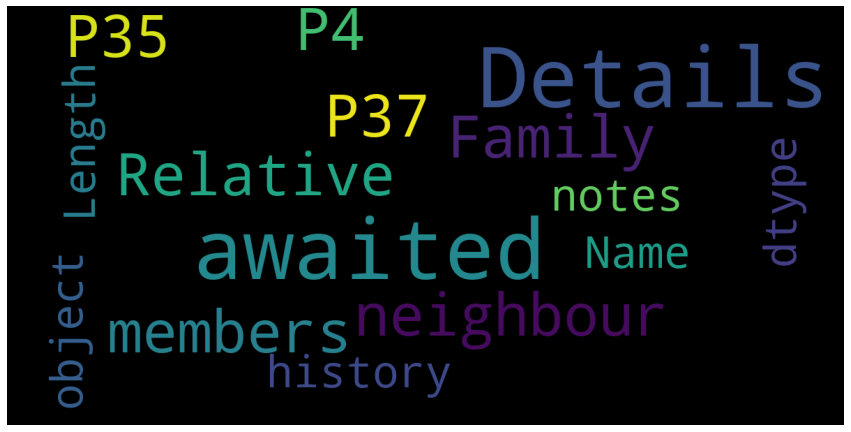

In [45]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(pep_no_trav_his['notes'].apply(lambda x: x.replace('travel', '')))


- From the notes it seems the other patients without any travel history, who have been affected are mainly the closed ones of the patients with travel history and few other exceptions
# COVID19 Test Results in India

In [46]:
colors = ['#269A06', '#AF0E06']
df_hos_bed_per_day_clean = df_hos_bed_per_day.dropna(subset=['TotalPositiveCases']).reset_index(drop=True)
df_hos_bed_per_day_clean['TotalIndividualsTested'].fillna(df_hos_bed_per_day_clean['Total Samples Tested']-900, inplace=True)
df_hos_bed_per_day_clean['totalnegative'] = df_hos_bed_per_day_clean['TotalIndividualsTested'] - df_hos_bed_per_day_clean['TotalPositiveCases']
negative = round(df_hos_bed_per_day_clean['totalnegative'].sum()/df_hos_bed_per_day_clean['TotalIndividualsTested'].sum()*100, 2)
positive = round(df_hos_bed_per_day_clean['TotalPositiveCases'].sum()/df_hos_bed_per_day_clean['TotalIndividualsTested'].sum()*100, 2)
fig = go.Figure(data=[go.Pie(labels=['People who tested Negative','People who tested Positive'],
                             values= [negative,positive],hole =.5)])
                          

fig.update_traces(title_text='COVID19 Test Results', hoverinfo='label+percent', textinfo='value', textfont_size=15,
                  marker=dict(colors=colors, line=dict(color='#FFFFFF', width=2)))
fig.show()

# COVID19 Test Results in Rest of the World

In [47]:
df_w_testing = pd.read_csv('../input/covid19-testing-rate-all-countries/full-list-total-tests-for-covid-19.csv')
df_w_testing.head(2)


,Entity,Code,Date,Total tests
0,Argentina,ARG,"Apr 8, 2020",13330
1,Argentina,ARG,"Apr 9, 2020",14850


In [48]:
df_w_testing = df_w_testing[(df_w_testing['Entity']=='Italy') | (df_w_testing['Entity']=='France') | \
                            (df_w_testing['Entity']=='Germany') | (df_w_testing['Entity']=='United Kingdom') | \
                            (df_w_testing['Entity']=='United States') | (df_w_testing['Entity']=='Spain') | \
                            ((df_w_testing['Entity']=='India'))]
df_w_testing['Date'] = pd.to_datetime(df_w_testing['Date'])
df_w_testing.reset_index(drop=True, inplace=True)

In [49]:
df_fra = df_w_testing[df_w_testing['Entity'] == 'France']
df_ita = df_w_testing[df_w_testing['Entity'] == 'Italy']
df_spa = df_w_testing[df_w_testing['Entity'] == 'Spain']
df_uk = df_w_testing[df_w_testing['Entity'] == 'United Kingdom']
df_us = df_w_testing[df_w_testing['Entity'] == 'United States']
df_ger = df_w_testing[df_w_testing['Entity'] == 'Germany']
df_fra_rate = pd.merge(df_fra[['Date', 'Total tests']], ncov_france[['ObservationDate', 'Confirmed']], left_on=['Date'], \
         right_on=['ObservationDate'], how='left')
df_ita_rate = pd.merge(df_ita[['Date', 'Total tests']], ncov_italy[['ObservationDate', 'Confirmed']], left_on=['Date'], \
         right_on=['ObservationDate'], how='left')
df_ger_rate = pd.merge(df_ger[['Date', 'Total tests']], ncov_germany[['ObservationDate', 'Confirmed']], left_on=['Date'], \
         right_on=['ObservationDate'], how='left')
df_us_rate = pd.merge(df_us[['Date', 'Total tests']], ncov_us[['ObservationDate', 'Confirmed']], left_on=['Date'], \
         right_on=['ObservationDate'], how='left')
df_uk_rate = pd.merge(df_uk[['Date', 'Total tests']], ncov_uk[['ObservationDate', 'Confirmed']], left_on=['Date'], \
         right_on=['ObservationDate'], how='left')
df_spa_rate = pd.merge(df_spa[['Date', 'Total tests']], ncov_spain[['ObservationDate', 'Confirmed']], left_on=['Date'], \
         right_on=['ObservationDate'], how='left')
df_fra_rate['positive_percentage'] = round(df_fra_rate['Confirmed']/df_fra_rate['Total tests'], 2)
df_ita_rate['positive_percentage'] = round(df_ita_rate['Confirmed']/df_ita_rate['Total tests'], 2)
df_ger_rate['positive_percentage'] = round(df_ger_rate['Confirmed']/df_ger_rate['Total tests'], 2)
df_us_rate['positive_percentage'] = round(df_us_rate['Confirmed']/df_us_rate['Total tests'], 2)
df_uk_rate['positive_percentage'] = round(df_uk_rate['Confirmed']/df_uk_rate['Total tests'], 2)
df_spa_rate['positive_percentage'] = round(df_spa_rate['Confirmed']/df_spa_rate['Total tests'], 2)
df_rate = pd.DataFrame(['France', 'Italy', 'Germany', 'USA', 'UK', 'Spain']).rename(columns={0:'Country'})
df_rate['positive_percentage_mean'] = [df_fra_rate['positive_percentage'].mean(), df_ita_rate['positive_percentage'].mean(), \
                                  df_ger_rate['positive_percentage'].mean(), df_us_rate['positive_percentage'].mean(), \
                                  df_uk_rate['positive_percentage'].mean(), df_spa_rate['positive_percentage'].mean()]
df_rate['positive_percentage_mean'] = df_rate['positive_percentage_mean']*100
df_rate['positive_percentage_mean'] = df_rate['positive_percentage_mean'].round(2)
df_rate

,Country,positive_percentage_mean
0,France,12.57
1,Italy,16.31
2,Germany,4.50
3,USA,16.79
4,UK,8.80
5,Spain,18.00


In [50]:
df_ind_rate = pd.read_excel('../input/covid19-india-complete-data/COVID19 India Complete Dataset April 2020.xlsx', sheet_name='ICMR Testing Count')
df_ind_rate = df_ind_rate.dropna(subset=['Total Positive Cases']).reset_index(drop=True)
df_ind_rate['Total Individuals Tested'].fillna(df_ind_rate['Total Samples Tested']-900, inplace=True)
df_ind_rate['positive_percentage'] = round(df_ind_rate['Total Positive Cases']/df_ind_rate['Total Individuals Tested'], 2)
df_ind_rate_count = pd.DataFrame(['India']).rename(columns={0:'Country'})
df_ind_rate_count['positive_percentage_mean'] = [round(df_ind_rate['positive_percentage'].mean()*100, 2)]
df_rate = pd.concat([df_rate, df_ind_rate_count], ignore_index=True)
fig = px.bar(df_rate.sort_values(by=['positive_percentage_mean'], ascending=False), x='Country', y='positive_percentage_mean',
            title='Percentage of People who turned out to be +ve in Testing')
fig.show()

In [51]:
df_hos_bed_per_day = df_hos_bed_per_day.dropna(subset=['TotalPositiveCases']).reset_index(drop=True)
df_hos_bed_per_day['TotalIndividualsTested'].fillna(df_hos_bed_per_day['Total Samples Tested']-900, inplace=True)
df_hos_bed_per_day['test_results_posratio'] = round(df_hos_bed_per_day['TotalPositiveCases']/df_hos_bed_per_day['TotalIndividualsTested'], 3)
df_hos_bed_per_day.head(2)
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=df_hos_bed_per_day['DateTime'], y=df_hos_bed_per_day['test_results_posratio']*100, name='Confirmed Cases', \
                         marker=dict(color='#D32210')))
fig1.layout.update(title_text='COVID-19 Positive Detection per Test Ratio in India w.r.t. Time',xaxis_showgrid=False, width=700, yaxis_title='% of Patients Tested +ve',
        height=500,font=dict(
#         family="Courier New, monospace",
        size=12,
        color="white"
    ))
fig1.layout.plot_bgcolor = '#097E99'
fig1.layout.paper_bgcolor = '#097E99'
fig1.show()


In [52]:
type(df_hos_bed_per_day['DateTime'][0])

datetime.date

In [53]:
dbd_tc_india.rename(columns={'Daily Confirmed':'New Cases'}, inplace=True)
dbd_tc_india.head(2)
ss = []
for i in dbd_tc_india.index:
    if(i!= min(dbd_tc_india.index)):
        lm = dbd_tc_india.loc[i]['New Cases']/dbd_tc_india.loc[i-1]['New Cases']
    else:
        lm = np.NaN
    ss.append(lm)
        
dbd_tc_india['Growth_Rate'] = ss
dbd_tc_india.head(2)

,Date,Total Recovered,Total Deceased,Total Confirmed,New Cases,Daily Deceased,Growth_Rate
1,2020-01-31,0,0,1,0.0,0.0,NaN
2,2020-02-01,0,0,2,1.0,0.0,inf


In [54]:
# Analysing the Growth Factor in India
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=dbd_tc_india.iloc[35:(dbd_tc_india.shape[0]-1)]['Date'], y=dbd_tc_india.iloc[35:(dbd_tc_india.shape[0]-1)]['Growth_Rate'], name='Growth Factor', \
                         marker=dict(color='#008040')))
fig1.layout.update(title_text='COVID-19 Growth Factor in India w.r.t. Time',xaxis_showgrid=False, yaxis_showgrid=False, width=700, yaxis_title='Growth Factor',
        height=500,font=dict(
#         family="Courier New, monospace",
        size=12,
        color="white"
    ))
fig1.layout.plot_bgcolor = '#4d3900'
fig1.layout.paper_bgcolor = '#4d3900'
fig1.show()

In [55]:
print('Mean Growth Factor in India = ', round(dbd_tc_india.iloc[35:]['Growth_Rate'].mean(), 2))
df_ind_main = pd.read_excel('../input/covid19-india-complete-data/COVID19 India Complete Dataset April 2020.xlsx', sheet_name='Raw Data')
df_ind_main = df_ind_main.dropna(subset=['Date Announced'])
df_ind_main.reset_index(drop=True)
df_ind_main = df_ind_main.drop_duplicates(subset=df_ind_main.drop('Patient Number', axis=1).columns)
df_ind_main.reset_index(drop=True)
df_ind_main.head(2)

Mean Growth Factor in India =  1.52


,Patient Number,State Patient Number,Date Announced,Estimated Onset Date,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Current Status,Notes,Contracted from which Patient (Suspected),Nationality,Type of transmission,Status Change Date,Source_1,Source_2,Source_3,Backup Notes
0,1,KL-TS-P1,2020-01-30,NaN,20,F,Thrissur,Thrissur,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,2020-02-14,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan
1,2,KL-AL-P1,2020-02-02,NaN,NaN,NaN,Alappuzha,Alappuzha,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,2020-02-14,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan


In [56]:
# Guesstimating the population that might have been affected by the Patients based on their places visited
col = 'Notes'
df_ind_main['Notes'] = df_ind_main['Notes'].fillna('NA').apply(lambda x: x.replace('No Travel', 'Non-travel'))
conditions  = [ df_ind_main[col].str.contains('Travel') == True, df_ind_main[col].str.contains('Attended|attended') == True]
choices     = [1300, 350] 

# Guesstimating avg. population that might have been affected (Airport: 1200 (flight+both side airport) + 100[miscellaneous], 
# Religious Event: 250 + 100[miscellaneous])

df_ind_main["estd_population"] = np.select(conditions, choices, default=100) # default is 100 (only miscellaneous)

To better understand this I'm going to try out SIR models¶
SIR Epidemic Model for India
This is a potential SIR model, if lockdown hadn't been imposed (14th March - 14th April, 30 days)

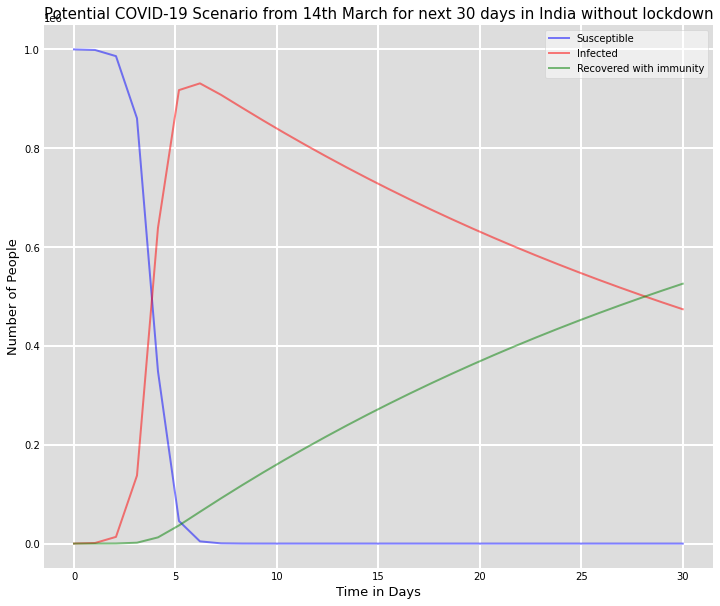

In [57]:
# Total population, N.
N = 1000000 # considering the a rough estimate of 10 lakhs as population of India who might have been exposed because 135 crore,
            # i.e. the entire population is too unrealistic
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 102, 19 # till India crossed 100 cases
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 2.4, 1./35 # considering Beta & Gamma value based on China's & Europe situation
# A grid of time points (in days)
t = np.linspace(0, 30, 30)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w', figsize=(12,10))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time in Days', size=13)
ax.set_ylabel('Number of People', size=13)
# ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
ax.set_facecolor('#dddddd')
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
ax.set_title('Potential COVID-19 Scenario from 14th March for next 30 days in India without lockdown', size=15)
plt.show()


In [58]:
dbd_tc_india.head(2)
dbd_tc_param = pd.DataFrame(dbd_tc_india.groupby(['Date'])['Total Confirmed','Total Recovered', 'Total Deceased'].sum().reset_index())
dbd_tc_param['Total Active Cases'] = dbd_tc_param['Total Confirmed'] - dbd_tc_param['Total Recovered'] - dbd_tc_param['Total Deceased']
dbd_tc_param.tail()

,Date,Total Confirmed,Total Recovered,Total Deceased,Total Active Cases
90,2020-04-30,33330,8373,1075,23882
91,2020-05-01,34972,9065,1152,24755
92,2020-05-02,37157,9951,1218,25988
93,2020-05-03,40124,10887,1306,27931
94,2020-05-04,42836,11762,1389,29685


In [59]:
dbd_tc_pl = dbd_tc_param[(dbd_tc_param['Date']>'2020-03-01') & (dbd_tc_param['Date']<'2020-03-25')].reset_index(drop=True) # considering pre lockdown period
dbd_tc_pl

,Date,Total Confirmed,Total Recovered,Total Deceased,Total Active Cases
0,2020-03-02,5,0,0,5
1,2020-03-03,6,3,0,3
2,2020-03-04,28,3,0,25
3,2020-03-05,30,3,0,27
4,2020-03-06,31,3,0,28
5,2020-03-07,34,3,0,31
6,2020-03-08,39,3,0,36
7,2020-03-09,46,3,0,43
8,2020-03-10,58,3,0,55
9,2020-03-11,60,3,0,57


In [60]:
dbd_tc_param = dbd_tc_param[dbd_tc_param['Date']>='2020-03-25'].reset_index(drop=True) # considering from lockdown date
dbd_tc_param = dbd_tc_param[:-1]
dbd_tc_param

,Date,Total Confirmed,Total Recovered,Total Deceased,Total Active Cases
0,2020-03-25,606,43,10,553
1,2020-03-26,694,45,15,634
2,2020-03-27,724,67,17,640
3,2020-03-28,909,80,19,810
4,2020-03-29,1024,96,27,901
5,2020-03-30,1251,102,31,1118
6,2020-03-31,1397,124,35,1238
7,2020-04-01,1834,144,41,1649
8,2020-04-02,2069,156,53,1860
9,2020-04-03,2547,163,62,2322


# Estimating Beta & Gamma for India through SIR Modeling
Beta and Gamma are estimated in the following way:
Validation data used is from 2nd Mar to 24th Mar (pre-lockdown period) and 25th Mar to 19th Apr (lockdown period)
Forward prediction of 60 days have been done from 20th April considering parameter values derived during lockdown period
Define y(t) for the SIR model, and then use RMSE as the loss function, and used L-BFGS-B gradient descent optimization to minimise the loss function

Pre-Lockdown Period (2nd March-25th March)

Assumptions taken:
An initial population of 50000 could have been potentially exposed to COVID-19 as of 2nd March

In [61]:
dbd_tc_pl['Date']=pd.to_datetime(dbd_tc_pl['Date'], format="%Y-%m-%d")
# df['Date'] = pd.to_datetime(df['Date'])

In [62]:
dbd_tc_pl['Date'].tail()

18   2020-03-20
19   2020-03-21
20   2020-03-22
21   2020-03-23
22   2020-03-24
Name: Date, dtype: datetime64[ns]

In [63]:
data = dbd_tc_pl.set_index('Date')['Total Active Cases']
infected = dbd_tc_pl.set_index('Date')['Total Confirmed']
recovered = dbd_tc_pl.set_index('Date')['Total Recovered']
data.index=data.index.to_pydatetime()
infected.index=infected.index.to_pydatetime()
recovered.index=recovered.index.to_pydatetime()
s_0 = 30000
i_0 = 5
r_0 = 3


      fun: 4.402789129836139
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.00010969, -0.00033236])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 87
      nit: 10
   status: 0
  success: True
        x: array([0.22357408, 0.0154134 ])
0.2235740786186261 0.015413402141297139
country=India, beta=0.22357408, gamma=0.01541340, r_0:14.50517391


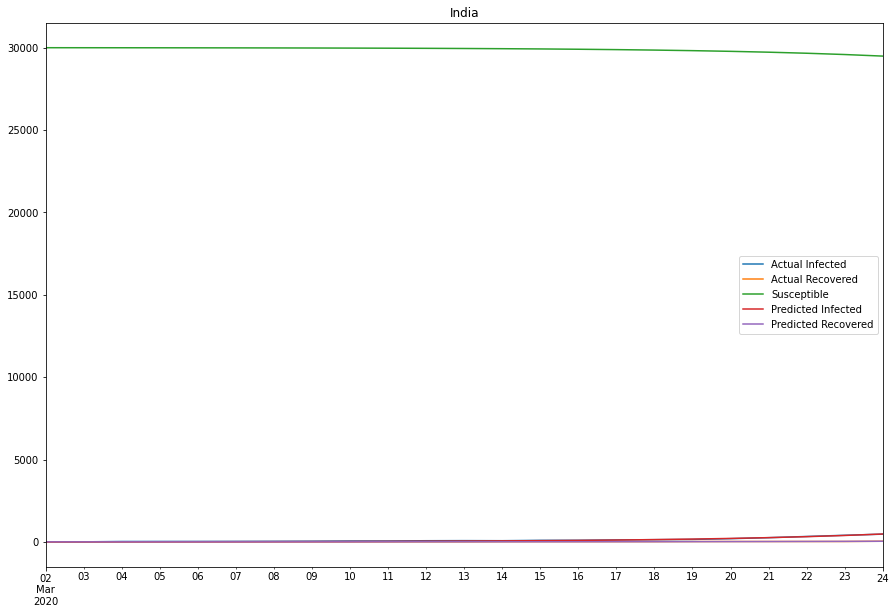

In [64]:
# Defining Loss Function for estimating Beta and Gamma
def loss(point, data, recovered, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2
def predict(beta, gamma, data, recovered, s_0, i_0, r_0):
    new_index = list(data.index.values)
    size = len(new_index)
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
    extended_recovered = np.concatenate((recovered.values, [None] * (size - len(recovered.values))))
    return new_index, extended_actual, extended_recovered, solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))
def train(recovered, infected, data):
    recovered = recovered
    infected = infected
    data = data

    optimal = minimize(loss, [0.001, 0.001], args=(data, recovered, s_0, i_0, r_0), method='L-BFGS-B', bounds=[(0.00000001, 2), (0.00000001, 0.4)])
    print(optimal)
    beta, gamma = optimal.x
    print(beta,gamma)
    new_index, extended_actual, extended_recovered, prediction = predict(beta, gamma, data, recovered, s_0, i_0, r_0)
    df = pd.DataFrame({'Actual Infected': extended_actual, 'Actual Recovered': extended_recovered, 'Susceptible': prediction.y[0], 'Predicted Infected': prediction.y[1], 'Predicted Recovered': prediction.y[2]}, index=new_index)
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.set_title('India')
    df.plot(ax=ax)
    print(f"country=India, beta={beta:.8f}, gamma={gamma:.8f}, r_0:{(beta/gamma):.8f}")
    fig.savefig(f"India.png")
train(recovered, infected, data)

Lockdown Period (25th Mar - 19th April)
Assumptions taken:
An initial population of 100000 could have been potentially exposed to COVID-19 as of 25th March

In [65]:
data = dbd_tc_param.set_index('Date')['Total Active Cases']
infected = dbd_tc_param.set_index('Date')['Total Confirmed']
recovered = dbd_tc_param.set_index('Date')['Total Recovered']
data.index=data.index.to_pydatetime()
infected.index=infected.index.to_pydatetime()
recovered.index=recovered.index.to_pydatetime()
s_0 = 100000 
i_0 = 883
r_0 = 75
def loss(point, data, recovered, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2
pres_fut = np.array(list(data.index.values)+ list((np.array(pd.date_range('2020-05-04', periods=240))))) # 60 days from 19th April

In [66]:
def predict(beta, gamma, data, recovered, s_0, i_0, r_0):
    new_index = pres_fut
    size = len(new_index)
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
    extended_recovered = np.concatenate((recovered.values, [None] * (size - len(recovered.values))))
    return new_index, extended_actual, extended_recovered, solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))

      fun: 464.2458444614364
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.041166  , 0.01698481])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 231
      nit: 16
   status: 0
  success: True
        x: array([0.13389838, 0.0268399 ])
country=India, beta=0.13389838, gamma=0.02683990, r_0:4.98878143


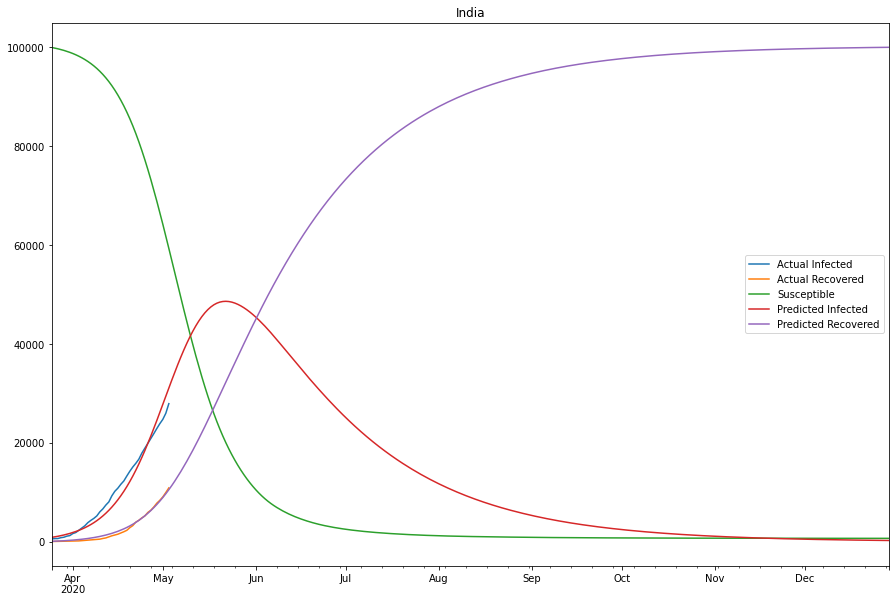

In [67]:
def train(recovered, infected, data):
    recovered = recovered
    infected = infected
    data = data

    optimal = minimize(loss, [0.001, 0.001], args=(data, recovered, s_0, i_0, r_0), method='L-BFGS-B', bounds=[(0.000001, 0.5), (0.00000001, 0.4)])
    print(optimal)
    beta, gamma = optimal.x
    new_index, extended_actual, extended_recovered, prediction = predict(beta, gamma, data, recovered, s_0, i_0, r_0)
    df = pd.DataFrame({'Actual Infected': extended_actual, 'Actual Recovered': extended_recovered, 'Susceptible': prediction.y[0], 'Predicted Infected': prediction.y[1], 'Predicted Recovered': prediction.y[2]}, index=new_index)
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.set_title('India')
    df.plot(ax=ax)
    print(f"country=India, beta={beta:.8f}, gamma={gamma:.8f}, r_0:{(beta/gamma):.8f}")
    fig.savefig(f"LD India.png")
    return df
pred_india=train(recovered, infected, data)

      fun: 464.2458444614364
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.041166  , 0.01698481])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 231
      nit: 16
   status: 0
  success: True
        x: array([0.13389838, 0.0268399 ])
country=India, beta=0.03347459, gamma=0.02683990, r_0:1.24719536
country=India, beta=0.06694919, gamma=0.02683990, r_0:2.49439071
country=India, beta=0.10042378, gamma=0.02683990, r_0:3.74158607
country=India, beta=0.13389838, gamma=0.02683990, r_0:4.98878143
country=India, beta=0.16737297, gamma=0.02683990, r_0:6.23597679
country=India, beta=0.20084757, gamma=0.02683990, r_0:7.48317214
country=India, beta=0.23432216, gamma=0.02683990, r_0:8.73036750


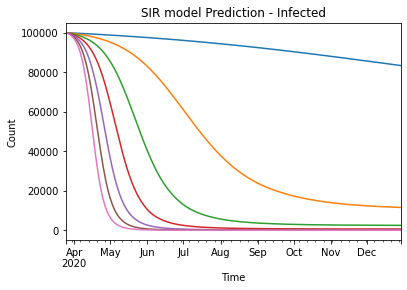

In [68]:
list_df=[]
def train(recovered, infected, data):
    recovered = recovered
    infected = infected
    data = data

    optimal = minimize(loss, [0.001, 0.001], args=(data, recovered, s_0, i_0, r_0), method='L-BFGS-B', bounds=[(0.000001, 0.5), (0.00000001, 0.4)])
    print(optimal)
    beta, gamma = optimal.x
    ef=[.25,.5,.75,1,1.25,1.5,1.75]
    fig, ax = plt.subplots()
    for i in ef:
        beta=i*optimal.x[0]
        new_index, extended_actual, extended_recovered, prediction = predict(beta, gamma, data, recovered, s_0, i_0, r_0)
        df = pd.DataFrame({'Actual Infected': extended_actual, 'Actual Recovered': extended_recovered, 'Susceptible': prediction.y[0], 'Predicted Infected': prediction.y[1], 'Predicted Recovered': prediction.y[2]}, index=new_index)
#         fig, ax = plt.subplots(figsize=(15, 10))
        ax.set_title('Ef='+str(i))
        df['Susceptible'].plot(ax=ax)
        print(f"country=India, beta={beta:.8f}, gamma={gamma:.8f}, r_0:{(beta/gamma):.8f}")
        x="ef"+str(i)+"India.png"
        list_df.append(df)
#         fig.savefig(x)
    plt.ylabel('Count')
    plt.xlabel('Time')
    plt.title('SIR model Prediction - Infected')
    plt.show()
    return df
pred_india=train(recovered, infected, data)
pred_india=list_df[3] # get predicted dataframe for Ef=1

# getting new cases/day from prediction

In [69]:
pred_india.head()

,Actual Infected,Actual Recovered,Susceptible,Predicted Infected,Predicted Recovered
2020-03-25,553,43,100000.000000,883.000000,75.000000
2020-03-26,634,45,99875.288110,982.697822,100.014068
2020-03-27,640,67,99736.688168,1093.460473,127.851359
2020-03-28,810,80,99582.705886,1216.466749,158.827365
2020-03-29,901,96,99411.717139,1353.004297,193.278563


In [70]:
cols_to_sum = ['Predicted Infected','Predicted Recovered']
df=pred_india
df['predicted total'] = pred_india[cols_to_sum].sum(axis=1)
df['daily new cases'] =  df['predicted total'].diff()
df=df[1:]
df

,Actual Infected,Actual Recovered,Susceptible,Predicted Infected,Predicted Recovered,predicted total,daily new cases
2020-03-26,634,45,99875.288110,982.697822,100.014068,1082.711890,124.711890
2020-03-27,640,67,99736.688168,1093.460473,127.851359,1221.311832,138.599941
2020-03-28,810,80,99582.705886,1216.466749,158.827365,1375.294114,153.982282
2020-03-29,901,96,99411.717139,1353.004297,193.278563,1546.282861,170.988747
2020-03-30,1118,102,99221.915518,1504.499619,231.584862,1736.084482,189.801621
...,...,...,...,...,...,...,...
2020-12-25,None,None,679.717484,272.095959,100006.186557,100278.282516,0.250925
2020-12-26,None,None,679.473072,265.131326,100013.395602,100278.526928,0.244412
2020-12-27,None,None,679.235002,258.344894,100020.420104,100278.764998,0.238071
2020-12-28,None,None,679.003105,251.732086,100027.264809,100278.996895,0.231897


# date at which peak number of daily cases per day is estimated

In [71]:
peak=df[df['daily new cases']==df['daily new cases'].max()] 
peak

,Actual Infected,Actual Recovered,Susceptible,Predicted Infected,Predicted Recovered,predicted total,daily new cases
2020-05-05,None,None,54368.211956,34310.319754,12279.468291,46589.788044,2498.077862


In [72]:
end97=peak['daily new cases']*.03
end99=peak['daily new cases']*0.01
index = abs(df['daily new cases'] - int(end97)).idxmin()
rowdata97 = pd.DataFrame(df.loc[ index , : ])
rowdata97=rowdata97.transpose()
rowdata97

,Actual Infected,Actual Recovered,Susceptible,Predicted Infected,Predicted Recovered,predicted total,daily new cases
2020-07-04,None,None,2277.13,23381.1,75299.8,98680.9,73.187


In [73]:
index = abs(df['daily new cases'] - int(end99)).idxmin()
rowdata99 = pd.DataFrame(df.loc[ index , : ])
rowdata99=rowdata99.transpose()
rowdata99

,Actual Infected,Actual Recovered,Susceptible,Predicted Infected,Predicted Recovered,predicted total,daily new cases
2020-07-27,None,None,1306.02,13289.7,86362.3,99652,24.22


In [74]:
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=df.index.to_pydatetime(), y=df['daily new cases'], name='Daily new cases per day', \
                         ))

fig1.add_trace(go.Scatter(x=peak.index.to_pydatetime(), y=peak['daily new cases'],mode='markers',
    marker=dict(
        size=8,
        color='red',
        symbol='cross'
    ),
    name='Peak'
))
fig1.add_trace(go.Scatter(x=rowdata97.index.to_pydatetime(), y=rowdata97['daily new cases'],mode='markers',
    marker=dict(
        size=8,
        color='orange',
        symbol='cross'
    ),
    name='End 97%'
))
fig1.add_trace(go.Scatter(x=rowdata99.index.to_pydatetime(), y=rowdata99['daily new cases'],mode='markers',
    marker=dict(
        size=8,
        color='green',
        symbol='cross'
    ),
    name='End 99%'
))
fig1.layout.update(title_text='Predicting daily new cases per day with SIR modelling',xaxis_showgrid=False, width=800, xaxis_title='Date',\
                yaxis_title='Patient Count',
        height=600,font=dict(
        size=14,
    ))

fig1.show()

In [75]:
fig1 = go.Figure()
Ef=0.25
for df in list_df:
    cols_to_sum = ['Predicted Infected','Predicted Recovered']
    df['predicted total'] = df[cols_to_sum].sum(axis=1)
    df['daily new cases'] =  df['predicted total'].diff()
    df=df[1:]
    fig1.add_trace(go.Scatter(x=df.index.to_pydatetime(), y=df['daily new cases'], name='Predicted with Ef='+str(Ef), \
                             ))
#     fig1.add_trace(go.Scatter(x=df.index.to_pydatetime(), y=df['Susceptible'], name='Susceptible with Ef='+str(Ef), \
#                              ))
#     fig1.add_trace(go.Scatter(x=df.index.to_pydatetime(), y=df['Predicted Recovered'], name='Recovered with Ef='+str(Ef), \
#                              ))

# fig1.add_trace(go.Scatter(x=df.index.values, y=df['Actual Infected'], name='Actual with Ef='+str(Ef), \
#                          ))
    Ef+=0.25

fig1.layout.update(title_text='Predicting daily new cases per day with SIR modelling',xaxis_showgrid=False, width=800, xaxis_title='Date',\
                yaxis_title='Patient Count',
        height=600,font=dict(
#         family="Courier New, monospace",
        size=14,
#         color="white"
    ))
# fig1.layout.plot_bgcolor = '#3E6704'
# fig1.layout.paper_bgcolor = '#3E6704'
fig1.show()

# date at which peak number of active infections is estimated

In [76]:
x=pred_india[pred_india['Predicted Infected']==pred_india['Predicted Infected'].max()] 
x

,Actual Infected,Actual Recovered,Susceptible,Predicted Infected,Predicted Recovered,predicted total,daily new cases
2020-05-22,None,None,20043.4027,48640.418999,32274.178301,80914.5973,1337.979658


In [77]:
end97=x['Predicted Infected']*.03
end99=x['Predicted Infected']*0.01
end90=x['Predicted Infected']*0.10

In [78]:
index = abs(pred_india['Predicted Infected'] - int(end97)).idxmin()
rowdata97 = pred_india.loc[ index , : ]
rowdata97 = pd.DataFrame(df.loc[ index , : ])
rowdata97=rowdata97.transpose()
rowdata97

,Actual Infected,Actual Recovered,Susceptible,Predicted Infected,Predicted Recovered,predicted total,daily new cases
2020-10-21,None,None,16.0662,690.354,100252,100942,0.0262434


In [79]:
index = abs(pred_india['Predicted Infected'] - int(end99)).idxmin()
rowdata99 = pred_india.loc[ index , : ]
rowdata99 = pd.DataFrame(df.loc[ index , : ])
rowdata99=rowdata99.transpose()
rowdata99

,Actual Infected,Actual Recovered,Susceptible,Predicted Infected,Predicted Recovered,predicted total,daily new cases
2020-12-03,None,None,15.4185,218.395,100724,100943,0.0079383


In [80]:
index = abs(pred_india['Predicted Infected'] - int(end90)).idxmin()
rowdata90 = pred_india.loc[ index , : ]
rowdata90 = pd.DataFrame(df.loc[ index , : ])
rowdata90=rowdata90.transpose()
rowdata90

,Actual Infected,Actual Recovered,Susceptible,Predicted Infected,Predicted Recovered,predicted total,daily new cases
2020-09-04,None,None,18.6907,2431.95,98507.4,100939,0.108987


# SIR modelling results with Social restriction parameter 

In [81]:
fig1 = go.Figure()
Ef=0.25
for df in list_df:
    fig1.add_trace(go.Scatter(x=df.index.to_pydatetime(), y=df['Predicted Infected'], name='Predicted with Ef='+str(Ef), \
                             ))
#     fig1.add_trace(go.Scatter(x=df.index.to_pydatetime(), y=df['Susceptible'], name='Susceptible with Ef='+str(Ef), \
#                              ))
#     fig1.add_trace(go.Scatter(x=df.index.to_pydatetime(), y=df['Predicted Recovered'], name='Recovered with Ef='+str(Ef), \
#                              ))

# fig1.add_trace(go.Scatter(x=df.index.values, y=df['Actual Infected'], name='Actual with Ef='+str(Ef), \
#                          ))
    Ef+=0.25

fig1.layout.update(title_text='Predicting Infected patients with SIR modelling',xaxis_showgrid=False, width=800, xaxis_title='Date',\
                yaxis_title='Patient Count',
        height=600,font=dict(
#         family="Courier New, monospace",
        size=14,
#         color="white"
    ))
# fig1.layout.plot_bgcolor = '#3E6704'
# fig1.layout.paper_bgcolor = '#3E6704'
fig1.show()

In [82]:
fig1 = go.Figure()
Ef=0.25
for df in list_df:
    if Ef in [0.75,1.0,1.25]:
        fig1.add_trace(go.Scatter(x=df.index.to_pydatetime(), y=df['Predicted Infected'], name='Predicted with Ef='+str(Ef), \
                                 ))
        fig1.add_trace(go.Scatter(x=df.index.to_pydatetime(), y=df['Susceptible'], name='Susceptible with Ef='+str(Ef), \
                                 ))
        fig1.add_trace(go.Scatter(x=df.index.to_pydatetime(), y=df['Predicted Recovered'], name='Recovered with Ef='+str(Ef), \
                                 ))
    
#     fig1.add_trace(go.Scatter(x=df.index.values, y=df['Actual Infected'], name='Actual with Ef='+str(Ef), \
#                              ))
    Ef+=0.25

fig1.layout.update(title_text='SIR modelling for Effect of Restrictions like Lockdown etc.',xaxis_showgrid=False, width=800, xaxis_title='Date',\
                yaxis_title='Patient Count',
        height=600,font=dict(
#         family="Courier New, monospace",
        size=14,
#         color="white"
    ))
# fig1.layout.plot_bgcolor = '#3E6704'
# fig1.layout.paper_bgcolor = '#3E6704'
fig1.show()

In [83]:
pred_india

,Actual Infected,Actual Recovered,Susceptible,Predicted Infected,Predicted Recovered,predicted total,daily new cases
2020-03-25,553,43,100000.000000,883.000000,75.000000,958.000000,NaN
2020-03-26,634,45,99875.288110,982.697822,100.014068,1082.711890,124.711890
2020-03-27,640,67,99736.688168,1093.460473,127.851359,1221.311832,138.599941
2020-03-28,810,80,99582.705886,1216.466749,158.827365,1375.294114,153.982282
2020-03-29,901,96,99411.717139,1353.004297,193.278563,1546.282861,170.988747
...,...,...,...,...,...,...,...
2020-12-25,None,None,679.717484,272.095959,100006.186557,100278.282516,0.250925
2020-12-26,None,None,679.473072,265.131326,100013.395602,100278.526928,0.244412
2020-12-27,None,None,679.235002,258.344894,100020.420104,100278.764998,0.238071
2020-12-28,None,None,679.003105,251.732086,100027.264809,100278.996895,0.231897


# Inflection point analysis

In [84]:
ncov_india.head()

,ObservationDate,Confirmed,Deaths,Recovered
0,2020-01-30,1.0,0.0,0.0
1,2020-01-31,1.0,0.0,0.0
2,2020-02-01,1.0,0.0,0.0
3,2020-02-02,2.0,0.0,0.0
4,2020-02-03,3.0,0.0,0.0


In [85]:
ncov_india['week_no'] = ncov_india['ObservationDate'].dt.week
ncov_india_infl = ncov_india.drop_duplicates(subset=['week_no'], keep='last').reset_index(drop=True)
ncov_india_infl

ncov_india_infl_weekly = ncov_india_infl.set_index(['week_no']).diff().reset_index().fillna(0)
ncov_india_infl_weekly.rename(columns={'Confirmed':'Increased_Cases'}, inplace=True)
ncov_india_infl_weekly
ncov_india_infl = pd.merge(ncov_india_infl, ncov_india_infl_weekly[['week_no', 'Increased_Cases']], how='left')
ncov_india_infl

,ObservationDate,Confirmed,Deaths,Recovered,week_no,Increased_Cases
0,2020-02-02,2.0,0.0,0.0,5,0.0
1,2020-02-09,3.0,0.0,0.0,6,1.0
2,2020-02-16,3.0,0.0,3.0,7,0.0
3,2020-02-23,3.0,0.0,3.0,8,0.0
4,2020-03-01,3.0,0.0,3.0,9,0.0
5,2020-03-08,39.0,0.0,3.0,10,36.0
6,2020-03-15,113.0,2.0,13.0,11,74.0
7,2020-03-22,396.0,7.0,24.0,12,283.0
8,2020-03-29,1024.0,27.0,95.0,13,628.0
9,2020-04-05,3588.0,99.0,229.0,14,2564.0


In [86]:
ncov_india_infl['Increased_Cases'] = np.log(ncov_india_infl['Increased_Cases'])
ncov_india_infl = ncov_india_infl.replace([np.inf, -np.inf], np.nan)
ncov_india_infl = ncov_india_infl.fillna(0)
ncov_india_infl.drop(ncov_india_infl.tail(1).index,inplace=True) 
ncov_india_infl

,ObservationDate,Confirmed,Deaths,Recovered,week_no,Increased_Cases
0,2020-02-02,2.0,0.0,0.0,5,0.000000
1,2020-02-09,3.0,0.0,0.0,6,0.000000
2,2020-02-16,3.0,0.0,3.0,7,0.000000
3,2020-02-23,3.0,0.0,3.0,8,0.000000
4,2020-03-01,3.0,0.0,3.0,9,0.000000
5,2020-03-08,39.0,0.0,3.0,10,3.583519
6,2020-03-15,113.0,2.0,13.0,11,4.304065
7,2020-03-22,396.0,7.0,24.0,12,5.645447
8,2020-03-29,1024.0,27.0,95.0,13,6.442540
9,2020-04-05,3588.0,99.0,229.0,14,7.849324


In [87]:
ncov_india['week_no'] = ncov_india['ObservationDate'].dt.week
ncov_india_infl = ncov_india.drop_duplicates(subset=['week_no'], keep='last').reset_index(drop=True)
ncov_india_infl
ncov_india_infl_weekly = ncov_india_infl.set_index(['week_no']).diff().reset_index().fillna(0)
ncov_india_infl_weekly.rename(columns={'Confirmed':'Increased_Cases'}, inplace=True)
ncov_india_infl = pd.merge(ncov_india_infl, ncov_india_infl_weekly[['week_no', 'Increased_Cases']], how='left')
ncov_india_infl['Increased_Cases'] = np.log(ncov_india_infl['Increased_Cases'])
ncov_india_infl = ncov_india_infl.replace([np.inf, -np.inf], np.nan)
ncov_india_infl = ncov_india_infl.fillna(0)
ncov_india_infl.drop(ncov_india_infl.tail(1).index,inplace=True) 
ncov_india_infl

ncov_china['week_no'] = ncov_china['ObservationDate'].dt.week
ncov_china_infl = ncov_china.drop_duplicates(subset=['week_no'], keep='last').reset_index(drop=True)
ncov_china_infl
ncov_china_infl_weekly = ncov_china_infl.set_index(['week_no']).diff().reset_index().fillna(0)
ncov_china_infl_weekly.rename(columns={'Confirmed':'Increased_Cases'}, inplace=True)
ncov_china_infl = pd.merge(ncov_china_infl, ncov_china_infl_weekly[['week_no', 'Increased_Cases']], how='left')
ncov_china_infl['Increased_Cases'] = np.log(ncov_china_infl['Increased_Cases'])
ncov_china_infl = ncov_china_infl.replace([np.inf, -np.inf], np.nan)
ncov_china_infl = ncov_china_infl.fillna(0)
ncov_china_infl.drop(ncov_china_infl.tail(1).index,inplace=True) 
ncov_china_infl
ncov_italy['week_no'] = ncov_italy['ObservationDate'].dt.week
ncov_italy_infl = ncov_italy.drop_duplicates(subset=['week_no'], keep='last').reset_index(drop=True)
ncov_italy_infl
ncov_italy_infl_weekly = ncov_italy_infl.set_index(['week_no']).diff().reset_index().fillna(0)
ncov_italy_infl_weekly.rename(columns={'Confirmed':'Increased_Cases'}, inplace=True)
ncov_italy_infl = pd.merge(ncov_italy_infl, ncov_italy_infl_weekly[['week_no', 'Increased_Cases']], how='left')
ncov_italy_infl['Increased_Cases'] = np.log(ncov_italy_infl['Increased_Cases'])
ncov_italy_infl = ncov_italy_infl.replace([np.inf, -np.inf], np.nan)
ncov_italy_infl = ncov_italy_infl.fillna(0)
ncov_italy_infl.drop(ncov_italy_infl.tail(1).index,inplace=True) 
ncov_italy_infl
ncov_us['week_no'] = ncov_us['ObservationDate'].dt.week
ncov_us_infl = ncov_us.drop_duplicates(subset=['week_no'], keep='last').reset_index(drop=True)
ncov_us_infl
ncov_us_infl_weekly = ncov_us_infl.set_index(['week_no']).diff().reset_index().fillna(0)
ncov_us_infl_weekly.rename(columns={'Confirmed':'Increased_Cases'}, inplace=True)
ncov_us_infl = pd.merge(ncov_us_infl, ncov_us_infl_weekly[['week_no', 'Increased_Cases']], how='left')
ncov_us_infl['Increased_Cases'] = np.log(ncov_us_infl['Increased_Cases'])
ncov_us_infl = ncov_us_infl.replace([np.inf, -np.inf], np.nan)
ncov_us_infl = ncov_us_infl.fillna(0)
ncov_us_infl.drop(ncov_us_infl.tail(1).index,inplace=True) 
ncov_us_infl
ncov_germany['week_no'] = ncov_germany['ObservationDate'].dt.week
ncov_germany_infl = ncov_germany.drop_duplicates(subset=['week_no'], keep='last').reset_index(drop=True)
ncov_germany_infl
ncov_germany_infl_weekly = ncov_germany_infl.set_index(['week_no']).diff().reset_index().fillna(0)
ncov_germany_infl_weekly.rename(columns={'Confirmed':'Increased_Cases'}, inplace=True)
ncov_germany_infl = pd.merge(ncov_germany_infl, ncov_germany_infl_weekly[['week_no', 'Increased_Cases']], how='left')
ncov_germany_infl['Increased_Cases'] = np.log(ncov_germany_infl['Increased_Cases'])
ncov_germany_infl = ncov_germany_infl.replace([np.inf, -np.inf], np.nan)
ncov_germany_infl = ncov_germany_infl.fillna(0)
ncov_germany_infl.drop(ncov_germany_infl.tail(1).index,inplace=True) 
ncov_germany_infl
ncov_spain['week_no'] = ncov_spain['ObservationDate'].dt.week
ncov_spain_infl = ncov_spain.drop_duplicates(subset=['week_no'], keep='last').reset_index(drop=True)
ncov_spain_infl
ncov_spain_infl_weekly = ncov_spain_infl.set_index(['week_no']).diff().reset_index().fillna(0)
ncov_spain_infl_weekly.rename(columns={'Confirmed':'Increased_Cases'}, inplace=True)
ncov_spain_infl = pd.merge(ncov_spain_infl, ncov_spain_infl_weekly[['week_no', 'Increased_Cases']], how='left')
ncov_spain_infl['Increased_Cases'] = np.log(ncov_spain_infl['Increased_Cases'])
ncov_spain_infl = ncov_spain_infl.replace([np.inf, -np.inf], np.nan)
ncov_spain_infl = ncov_spain_infl.fillna(0)
ncov_spain_infl.drop(ncov_spain_infl.tail(1).index,inplace=True) 
ncov_spain_infl
ncov_soukor['week_no'] = ncov_soukor['ObservationDate'].dt.week
ncov_soukor_infl = ncov_soukor.drop_duplicates(subset=['week_no'], keep='last').reset_index(drop=True)
ncov_soukor_infl
ncov_soukor_infl_weekly = ncov_soukor_infl.set_index(['week_no']).diff().reset_index().fillna(0)
ncov_soukor_infl_weekly.rename(columns={'Confirmed':'Increased_Cases'}, inplace=True)
ncov_soukor_infl = pd.merge(ncov_soukor_infl, ncov_soukor_infl_weekly[['week_no', 'Increased_Cases']], how='left')
ncov_soukor_infl['Increased_Cases'] = np.log(ncov_soukor_infl['Increased_Cases'])
ncov_soukor_infl = ncov_soukor_infl.replace([np.inf, -np.inf], np.nan)
ncov_soukor_infl = ncov_soukor_infl.fillna(0)
ncov_spain_infl.drop(ncov_spain_infl.tail(1).index,inplace=True) 
ncov_soukor_infl
ncov_iran['week_no'] = ncov_iran['ObservationDate'].dt.week
ncov_iran_infl = ncov_iran.drop_duplicates(subset=['week_no'], keep='last').reset_index(drop=True)
ncov_iran_infl
ncov_iran_infl_weekly = ncov_iran_infl.set_index(['week_no']).diff().reset_index().fillna(0)
ncov_iran_infl_weekly.rename(columns={'Confirmed':'Increased_Cases'}, inplace=True)
ncov_iran_infl = pd.merge(ncov_iran_infl, ncov_iran_infl_weekly[['week_no', 'Increased_Cases']], how='left')
ncov_iran_infl['Increased_Cases'] = np.log(ncov_iran_infl['Increased_Cases'])
ncov_iran_infl = ncov_iran_infl.replace([np.inf, -np.inf], np.nan)
ncov_iran_infl = ncov_iran_infl.fillna(0)
ncov_iran_infl.drop(ncov_iran_infl.tail(1).index,inplace=True) 
ncov_iran_infl
ncov_france['week_no'] = ncov_france['ObservationDate'].dt.week
ncov_france_infl = ncov_france.drop_duplicates(subset=['week_no'], keep='last').reset_index(drop=True)
ncov_france_infl
ncov_france_infl_weekly = ncov_france_infl.set_index(['week_no']).diff().reset_index().fillna(0)
ncov_france_infl_weekly.rename(columns={'Confirmed':'Increased_Cases'}, inplace=True)
ncov_france_infl = pd.merge(ncov_france_infl, ncov_france_infl_weekly[['week_no', 'Increased_Cases']], how='left')
ncov_france_infl['Increased_Cases'] = np.log(ncov_france_infl['Increased_Cases'])
ncov_france_infl = ncov_france_infl.replace([np.inf, -np.inf], np.nan)
ncov_france_infl = ncov_france_infl.fillna(0)
ncov_france_infl.drop(ncov_france_infl.tail(1).index,inplace=True) 
ncov_france_infl
ncov_uk['week_no'] = ncov_uk['ObservationDate'].dt.week
ncov_uk_infl = ncov_uk.drop_duplicates(subset=['week_no'], keep='last').reset_index(drop=True)
ncov_uk_infl
ncov_uk_infl_weekly = ncov_uk_infl.set_index(['week_no']).diff().reset_index().fillna(0)
ncov_uk_infl_weekly.rename(columns={'Confirmed':'Increased_Cases'}, inplace=True)
ncov_uk_infl = pd.merge(ncov_uk_infl, ncov_uk_infl_weekly[['week_no', 'Increased_Cases']], how='left')
ncov_uk_infl['Increased_Cases'] = np.log(ncov_uk_infl['Increased_Cases'])
ncov_uk_infl = ncov_uk_infl.replace([np.inf, -np.inf], np.nan)
ncov_uk_infl = ncov_uk_infl.fillna(0)
ncov_uk_infl.drop(ncov_uk_infl.tail(1).index,inplace=True) 
ncov_uk_infl

,ObservationDate,Confirmed,Deaths,Recovered,week_no,Increased_Cases
0,2020-02-02,2.0,0.0,0.0,5,0.000000
1,2020-02-09,3.0,0.0,0.0,6,0.000000
2,2020-02-16,9.0,0.0,8.0,7,1.791759
3,2020-02-23,9.0,0.0,8.0,8,0.000000
4,2020-03-01,36.0,0.0,8.0,9,3.295837
5,2020-03-08,273.0,3.0,18.0,10,5.468060
6,2020-03-15,1144.0,21.0,19.0,11,6.769642
7,2020-03-22,5741.0,282.0,95.0,12,8.433159
8,2020-03-29,19780.0,1231.0,151.0,13,9.549594
9,2020-04-05,48436.0,4943.0,229.0,14,10.263118


We all know an exponential graph keeps on increasing, and when we are in that period of exponential we are not able to predict how far is the inflection point in the curve

Getting an Idea of the Inflection Point for a Country

In [88]:
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=ncov_india_infl['Confirmed'], y=ncov_india_infl['Increased_Cases'], name='India', \
                         ))
fig1.add_trace(go.Scatter(x=ncov_china_infl['Confirmed'], y=ncov_china_infl['Increased_Cases'], name='China', \
                         ))
fig1.add_trace(go.Scatter(x=ncov_italy_infl['Confirmed'], y=ncov_italy_infl['Increased_Cases'], name='Italy', \
                         ))
fig1.add_trace(go.Scatter(x=ncov_us_infl['Confirmed'], y=ncov_us_infl['Increased_Cases'], name='USA', \
                         ))
fig1.add_trace(go.Scatter(x=ncov_soukor_infl['Confirmed'], y=ncov_soukor_infl['Increased_Cases'], name='South Korea', \
                         ))
fig1.add_trace(go.Scatter(x=ncov_france_infl['Confirmed'], y=ncov_france_infl['Increased_Cases'], name='France', \
                         ))
fig1.add_trace(go.Scatter(x=ncov_uk_infl['Confirmed'], y=ncov_uk_infl['Increased_Cases'], name='UK', \
                         ))
fig1.add_trace(go.Scatter(x=ncov_iran_infl['Confirmed'], y=ncov_iran_infl['Increased_Cases'], name='Iran', \
                         ))
fig1.add_trace(go.Scatter(x=ncov_spain_infl['Confirmed'], y=ncov_spain_infl['Increased_Cases'], name='Spain', \
                         ))
fig1.add_trace(go.Scatter(x=ncov_germany_infl['Confirmed'], y=ncov_germany_infl['Increased_Cases'], name='Germany', \
                         ))


fig1.layout.update(title_text='Predicting Inflection Point for the Countries',xaxis_showgrid=False, width=800, xaxis_title='Total no. of Confirmed Cases',\
                yaxis_title='log(Increased no. of Confirmed Cases w.r.t. previous week)',
        height=600,font=dict(
#         family="Courier New, monospace",
        size=14,
        color="white"
    ))
fig1.layout.plot_bgcolor = '#3E6704'
fig1.layout.paper_bgcolor = '#3E6704'
fig1.show()

**The theory behind this is that, when the no. of weekly cases start dropping consistently for a few consecutive weeks w.r.t. previous week we have hit the inflection point**

We see that only China and South Korea have been able to hit the inflection point


For my understanding, I have taken reference from the following Kernel: https://www.kaggle.com/duttadebadri/covid-19-analysing-growth-sir-modeling-india/notebook